In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import pickle

In [14]:
df = pd.read_csv("Data/breast-cancer.csv")
df = shuffle(df)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
167,8712729,1,16.78,18.80,109.30,886.3,0.08865,0.09182,0.08422,0.06576,...,20.05,26.30,130.70,1260.0,0.1168,0.2119,0.23180,0.14740,0.2810,0.07228
57,857793,1,14.71,21.59,95.55,656.9,0.11370,0.13650,0.12930,0.08123,...,17.87,30.70,115.70,985.5,0.1368,0.4290,0.35870,0.18340,0.3698,0.10940
365,901088,1,20.44,21.78,133.80,1293.0,0.09150,0.11310,0.09799,0.07785,...,24.31,26.37,161.20,1780.0,0.1327,0.2376,0.27020,0.17650,0.2609,0.06735
494,914102,0,13.16,20.54,84.06,538.7,0.07335,0.05275,0.01800,0.01256,...,14.50,28.46,95.29,648.3,0.1118,0.1646,0.07698,0.04195,0.2687,0.07429
237,883263,1,20.48,21.46,132.50,1306.0,0.08355,0.08348,0.09042,0.06022,...,24.22,26.17,161.70,1750.0,0.1228,0.2311,0.31580,0.14450,0.2238,0.07127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,862028,1,15.06,19.83,100.30,705.6,0.10390,0.15530,0.17000,0.08815,...,18.23,24.23,123.50,1025.0,0.1551,0.4203,0.52030,0.21150,0.2834,0.08234
267,8910499,0,13.59,21.84,87.16,561.0,0.07956,0.08259,0.04072,0.02142,...,14.80,30.04,97.66,661.5,0.1005,0.1730,0.14530,0.06189,0.2446,0.07024
312,89382602,0,12.76,13.37,82.29,504.1,0.08794,0.07948,0.04052,0.02548,...,14.19,16.40,92.04,618.8,0.1194,0.2208,0.17690,0.08411,0.2564,0.08253
514,91594602,1,15.05,19.07,97.26,701.9,0.09215,0.08597,0.07486,0.04335,...,17.58,28.06,113.80,967.0,0.1246,0.2101,0.28660,0.11200,0.2282,0.06954


In [15]:
df.shape

(569, 32)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 167 to 198
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se            

In [17]:
df.describe().round(2).transpose() # Diagnosis is about 37% Malignent

,count,mean,std,min,25%,50%,75%,max
id,569.0,30371831.43,1.250206e+08,8670.00,869218.00,906024.00,8813129.00,9.113205e+08
diagnosis,569.0,0.37,4.800000e-01,0.00,0.00,0.00,1.00,1.000000e+00
radius_mean,569.0,14.13,3.520000e+00,6.98,11.70,13.37,15.78,2.811000e+01
texture_mean,569.0,19.29,4.300000e+00,9.71,16.17,18.84,21.80,3.928000e+01
perimeter_mean,569.0,91.97,2.430000e+01,43.79,75.17,86.24,104.10,1.885000e+02
area_mean,569.0,654.89,3.519100e+02,143.50,420.30,551.10,782.70,2.501000e+03
smoothness_mean,569.0,0.10,1.000000e-02,0.05,0.09,0.10,0.11,1.600000e-01
compactness_mean,569.0,0.10,5.000000e-02,0.02,0.06,0.09,0.13,3.500000e-01
concavity_mean,569.0,0.09,8.000000e-02,0.00,0.03,0.06,0.13,4.300000e-01
concave_points_mean,569.0,0.05,4.000000e-02,0.00,0.02,0.03,0.07,2.000000e-01


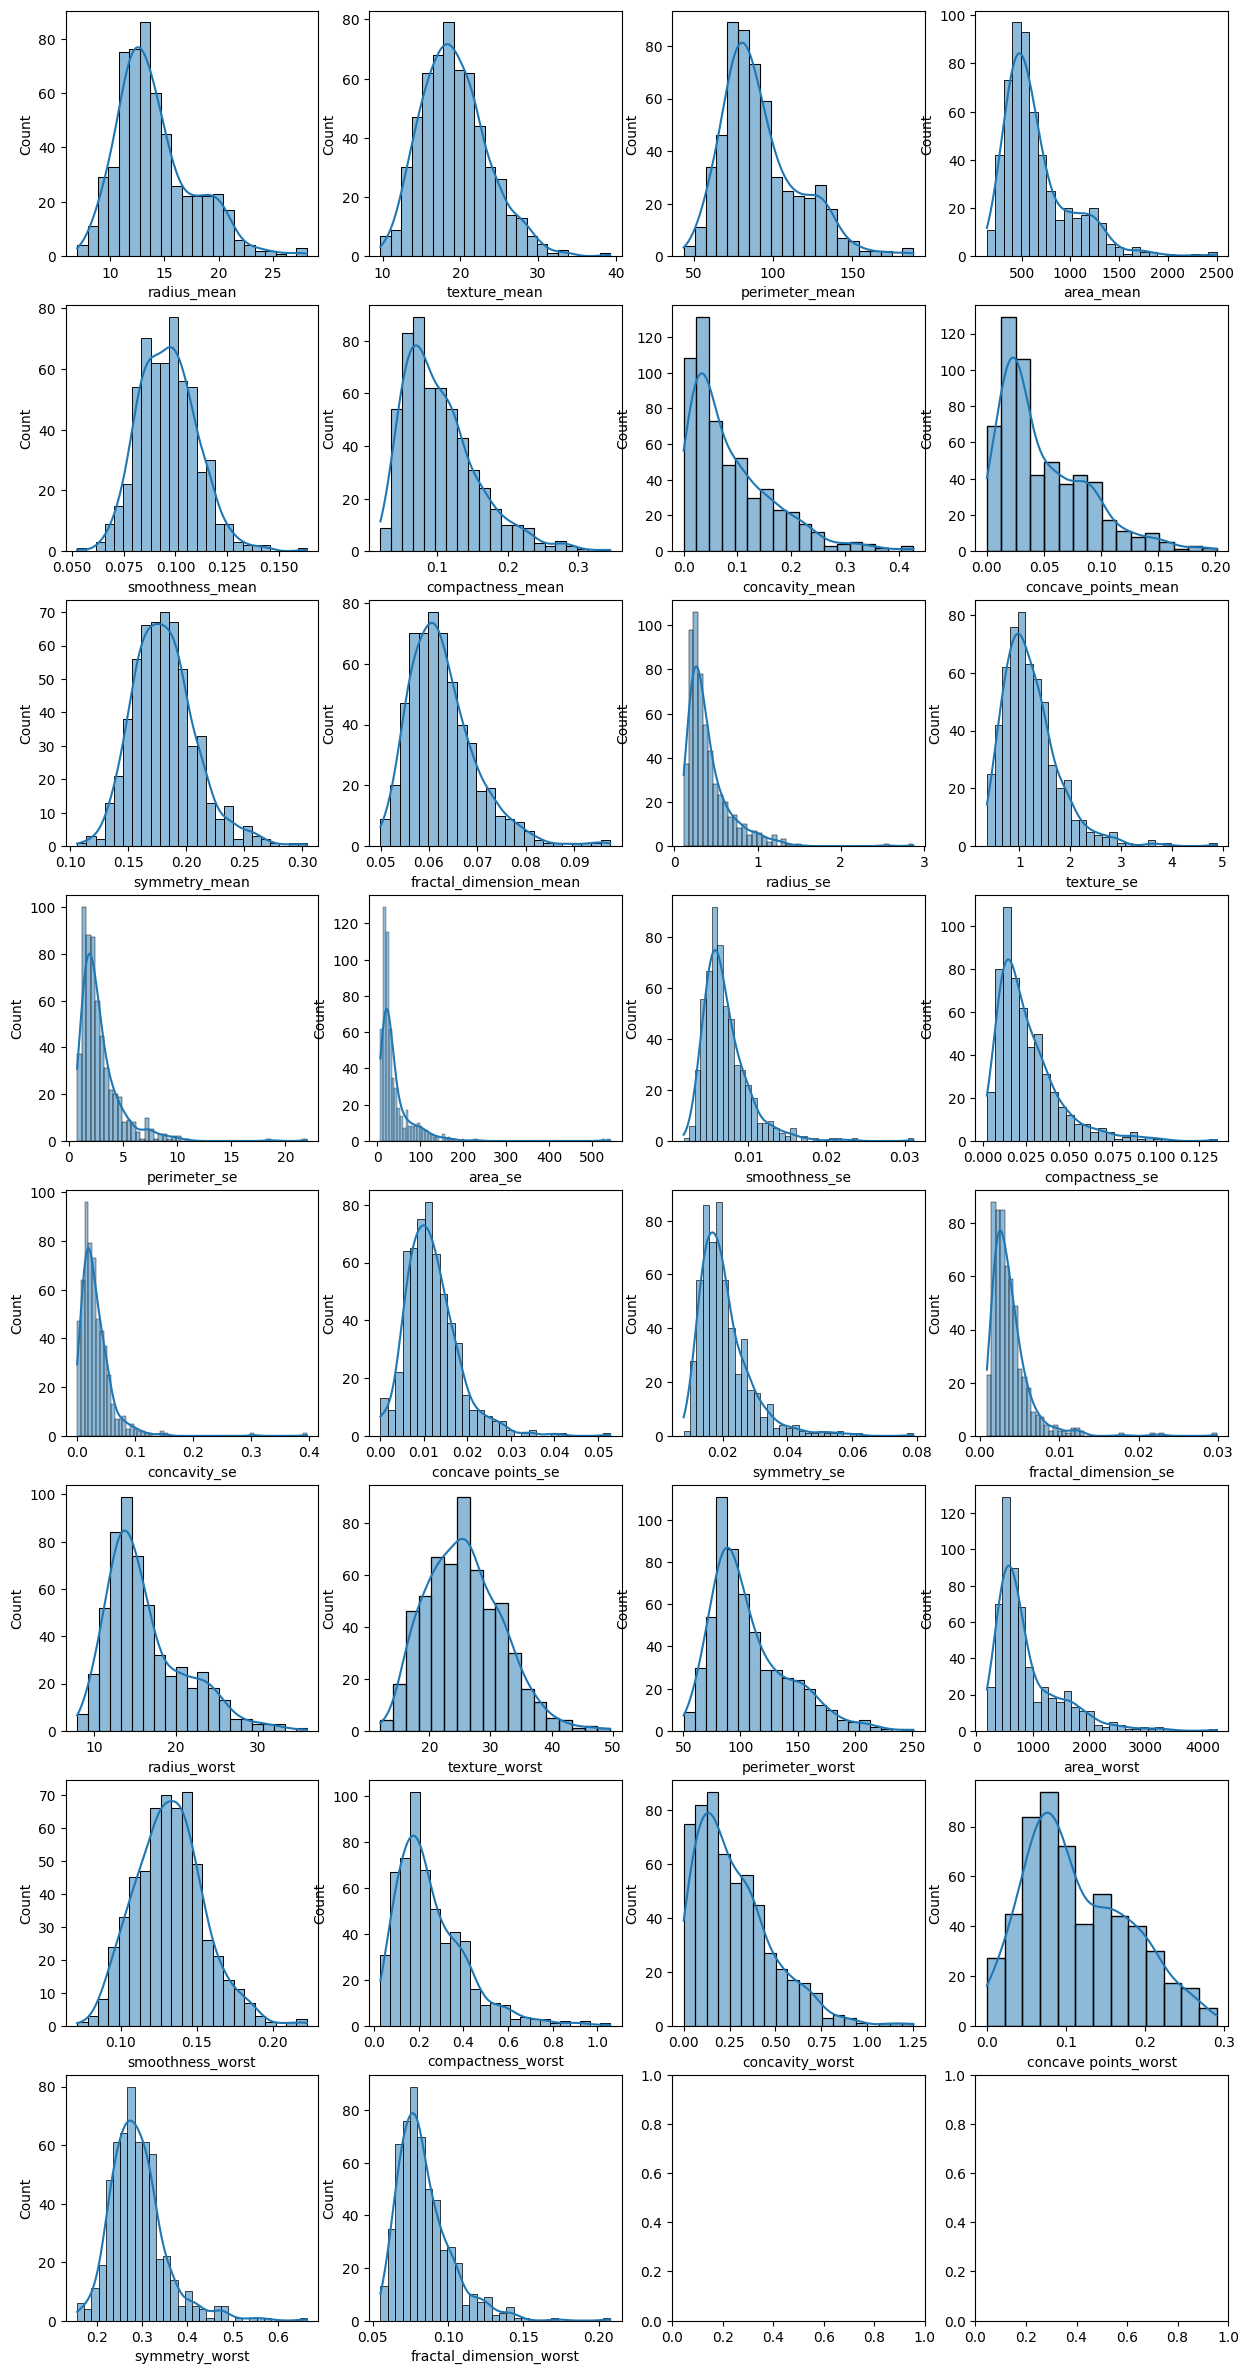

In [18]:
# select the columns to be plotted
cols = df.iloc[:,2:]

# create the figure and axes
fig, axes = plt.subplots(8, 4)
fig.set_size_inches(15, 30)  # ( x , y )
axes = axes.ravel()  # flattening the array makes indexing easier
for col, ax in zip(cols, axes):
    sns.histplot(data=df[col], kde=True, ax = ax)

plt.show()

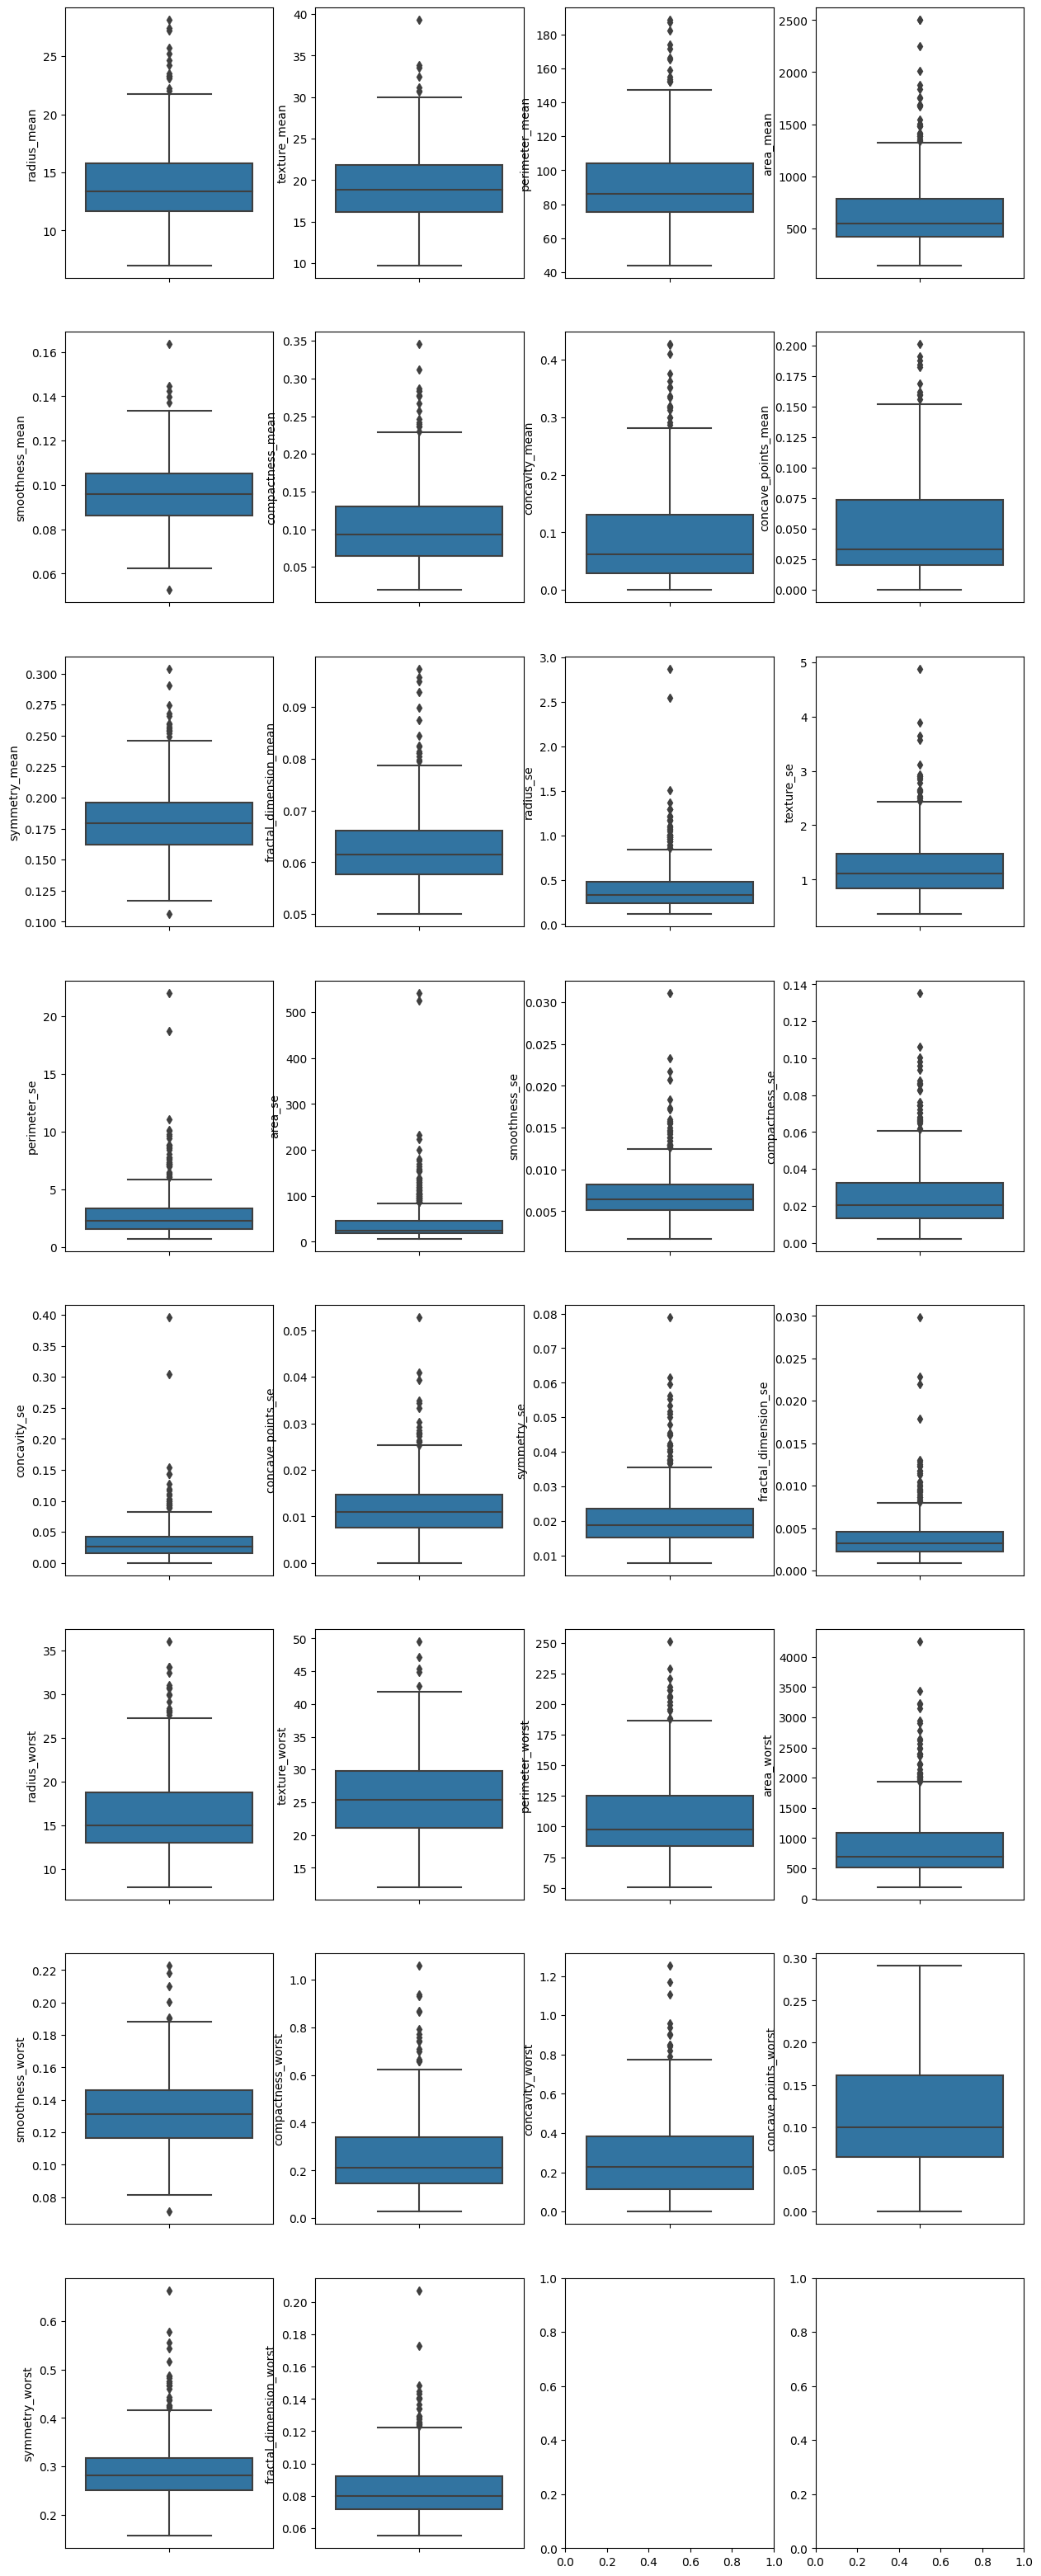

In [19]:
# select the columns to be plotted
cols = df.iloc[:,2:]

# create the figure and axes
fig, axes = plt.subplots(8, 4)
axes = axes.ravel()  # flattening the array makes indexing easier
fig.set_size_inches(15, 40)  # ( x , y )
for col, ax in zip(cols, axes):
    sns.boxplot(ax =ax,y=df[col])

plt.show()

In [20]:
# Calculate IQR
q75, q25 = np.percentile(df['area_worst'], [75 ,25])
IQR = q75 - q25

# Calculate lower and upper bounds
lower_bound = q25 - (IQR * 1.5)
upper_bound = q75 + (IQR * 1.5)

# Select rows that are outside the bounds
df_outliers = df.query('area_worst < @lower_bound or area_worst > @upper_bound')
df_outliers # 35 outliers

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
219,88119002,1,19.53,32.47,128.0,1223.0,0.08420,0.11300,0.1145,0.06637,...,27.90,45.41,180.2,2477.0,0.1408,0.4097,0.3995,0.1625,0.2713,0.07568
164,8712289,1,23.27,22.04,152.1,1686.0,0.08439,0.11450,0.1324,0.09702,...,28.01,28.22,184.2,2403.0,0.1228,0.3583,0.3948,0.2346,0.3589,0.09187
393,903516,1,21.61,22.28,144.4,1407.0,0.11670,0.20870,0.2810,0.15620,...,26.23,28.74,172.0,2081.0,0.1502,0.5717,0.7053,0.2422,0.3828,0.10070
300,892438,1,19.53,18.90,129.5,1217.0,0.11500,0.16420,0.2197,0.10620,...,25.93,26.24,171.1,2053.0,0.1495,0.4116,0.6121,0.1980,0.2968,0.09929
180,873592,1,27.22,21.87,182.1,2250.0,0.10940,0.19140,0.2871,0.18780,...,33.12,32.85,220.8,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082
24,852552,1,16.65,21.38,110.0,904.6,0.11210,0.14570,0.1525,0.09170,...,26.46,31.56,177.0,2215.0,0.1805,0.3578,0.4695,0.2095,0.3613,0.09564
250,884948,1,20.94,23.56,138.9,1364.0,0.10070,0.16060,0.2712,0.13100,...,25.58,27.00,165.3,2010.0,0.1211,0.3172,0.6991,0.2105,0.3126,0.07849
373,901288,1,20.64,17.35,134.8,1335.0,0.09446,0.10760,0.1527,0.08941,...,25.37,23.17,166.8,1946.0,0.1562,0.3055,0.4159,0.2112,0.2689,0.07055
339,89812,1,23.51,24.27,155.1,1747.0,0.10690,0.12830,0.2308,0.14100,...,30.67,30.73,202.4,2906.0,0.1515,0.2678,0.4819,0.2089,0.2593,0.07738
352,899987,1,25.73,17.46,174.2,2010.0,0.11490,0.23630,0.3368,0.19130,...,33.13,23.58,229.3,3234.0,0.1530,0.5937,0.6451,0.2756,0.3690,0.08815


In [21]:
# Remove Outliers, Copy orig df before 
df_outliers = df.copy()
for i in df_outliers:
    q75, q25 = np.percentile(df.loc[:,i],[75,25])
    IQR = q75 - q25
    max = q75 + 1.5*IQR
    min = q25 - 1.5*IQR
    df.loc[df_outliers[i] > max, i] = df_outliers[i].mean()
    df.loc[df_outliers[i] < min, i] = df_outliers[i].mean()

In [22]:
cor = df.corr().round(2)
cor.sort_values(['diagnosis'],ascending=False,inplace=True)
cor.diagnosis

diagnosis                  1.00
concave points_worst       0.79
perimeter_worst            0.79
radius_worst               0.78
concave_points_mean        0.78
area_worst                 0.76
perimeter_mean             0.74
concavity_mean             0.74
area_mean                  0.72
radius_mean                0.72
area_se                    0.68
concavity_worst            0.68
radius_se                  0.58
compactness_worst          0.58
perimeter_se               0.58
compactness_mean           0.57
concave points_se          0.46
texture_worst              0.44
concavity_se               0.44
smoothness_worst           0.42
texture_mean               0.41
smoothness_mean            0.37
compactness_se             0.36
symmetry_worst             0.35
symmetry_mean              0.33
fractal_dimension_worst    0.29
fractal_dimension_se       0.19
id                         0.07
texture_se                 0.01
fractal_dimension_mean    -0.00
smoothness_se             -0.02
symmetry

In [23]:
cor2 = df_outliers.corr().round(2)
cor2.sort_values(['diagnosis'],ascending=False,inplace=True)
cor2.diagnosis

diagnosis                  1.00
concave points_worst       0.79
perimeter_worst            0.78
concave_points_mean        0.78
radius_worst               0.78
perimeter_mean             0.74
radius_mean                0.73
area_worst                 0.73
area_mean                  0.71
concavity_mean             0.70
concavity_worst            0.66
compactness_mean           0.60
compactness_worst          0.59
radius_se                  0.57
perimeter_se               0.56
area_se                    0.55
texture_worst              0.46
smoothness_worst           0.42
symmetry_worst             0.42
texture_mean               0.42
concave points_se          0.41
smoothness_mean            0.36
symmetry_mean              0.33
fractal_dimension_worst    0.32
compactness_se             0.29
concavity_se               0.25
fractal_dimension_se       0.08
id                         0.04
symmetry_se               -0.01
texture_se                -0.01
fractal_dimension_mean    -0.01
smoothne

## Modeling

In [24]:
model_features =   df.loc[:,['perimeter_worst','radius_worst','concave_points_mean',
                'area_worst','perimeter_mean','area_mean','radius_mean',
                'area_se','concavity_worst','radius_se', 'compactness_worst',
                'perimeter_se','compactness_mean' ]]

model_features_outliers  =   df_outliers.loc[:,['perimeter_worst','radius_worst','concave_points_mean',
                    'area_worst','perimeter_mean','area_mean','radius_mean','area_se','concavity_worst',
                    'radius_se', 'compactness_worst','perimeter_se','compactness_mean' ]]

# X = model_features.values
X = model_features.values
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [25]:
if isinstance(X_train, pd.DataFrame):
    print('DType:\nX_train:{}, y_train:{}\nShape:\nX_train:{}, y_train:{}\nType:\nX_train:{}, y_train{}'
          .format(type(X_train),type(y_train),X_train.shape,y_train.shape,type(X_train),type(y_train)))
else:
    print('DType:\nX_train:{}, y_train:{}\nShape:\nX_train:{}, y_train:{}\nType:\nX_train:{}, y_train{}'
        .format(X_train.dtype,y_train.dtype,X_train.shape,y_train.shape,type(X_train),type(y_train)))
       

DType:
X_train:float64, y_train:float64
Shape:
X_train:(426, 14), y_train:(426,)
Type:
X_train:<class 'numpy.ndarray'>, y_train<class 'pandas.core.series.Series'>


### Logistic Regression

In [26]:
# Model Original
lgreg = LogisticRegression(max_iter=10000)
lgreg.fit(X_train, y_train)
y_pred = lgreg.predict(X_test)

In [27]:
# Metrics
cm = confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.93      0.93        76
         1.0       0.92      0.91      0.92        67

    accuracy                           0.92       143
   macro avg       0.92      0.92      0.92       143
weighted avg       0.92      0.92      0.92       143



<AxesSubplot: >

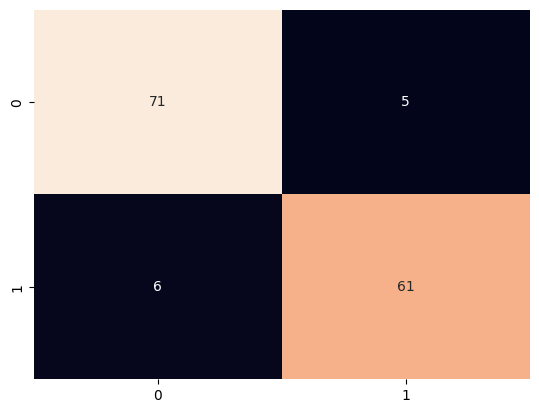

In [28]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, cbar=False)

### KNN

In [29]:
# Model Original Data
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [30]:
# Metrics
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89        76
         1.0       0.89      0.85      0.87        67

    accuracy                           0.88       143
   macro avg       0.88      0.88      0.88       143
weighted avg       0.88      0.88      0.88       143



<AxesSubplot: >

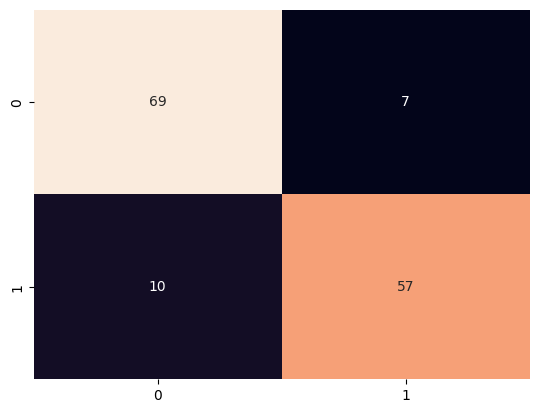

In [31]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, cbar=False)

### Linear SVM (kernel = linear)

In [51]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred = svm_linear.predict(X_test)

with open('Pickle/SVM_breast_cancer_pkl','wb') as file:
    pickle.dump(svm_linear,file)

In [33]:
# Metrics
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94        76
         1.0       0.93      0.94      0.93        67

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



<AxesSubplot: >

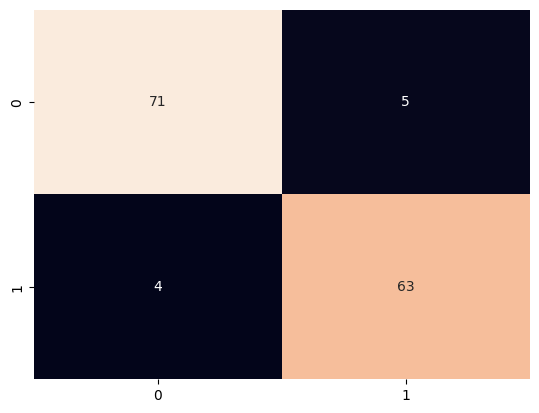

In [34]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, cbar=False)

### Linear SVM (kernel = rbf)

In [35]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

In [36]:
# Metrics
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.91      0.86        76
         1.0       0.88      0.76      0.82        67

    accuracy                           0.84       143
   macro avg       0.85      0.83      0.84       143
weighted avg       0.84      0.84      0.84       143



<AxesSubplot: >

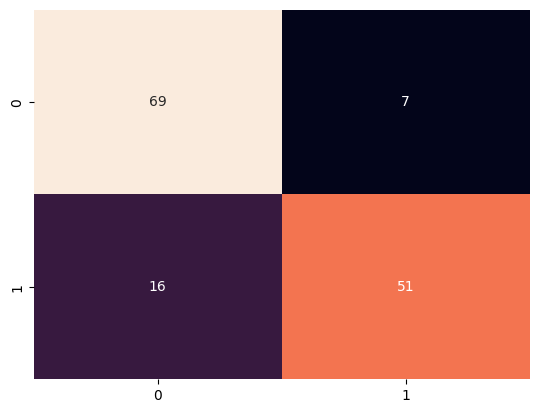

In [37]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, cbar=False)

### Naive Bayes

In [38]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

In [39]:
# Metrics
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92        76
         1.0       0.91      0.91      0.91        67

    accuracy                           0.92       143
   macro avg       0.92      0.92      0.92       143
weighted avg       0.92      0.92      0.92       143



<AxesSubplot: >

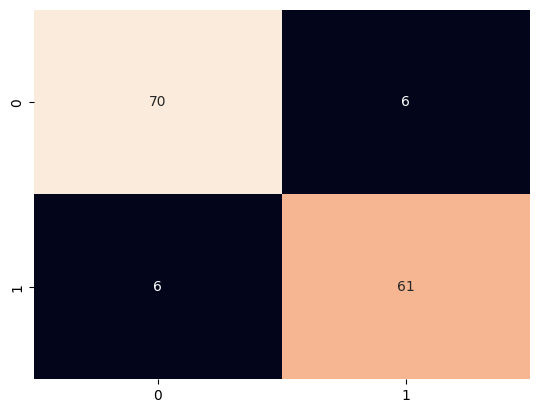

In [40]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, cbar=False)

### Decision Tree

In [41]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [42]:
# Metrics
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90        76
         1.0       0.92      0.85      0.88        67

    accuracy                           0.90       143
   macro avg       0.90      0.89      0.89       143
weighted avg       0.90      0.90      0.89       143



<AxesSubplot: >

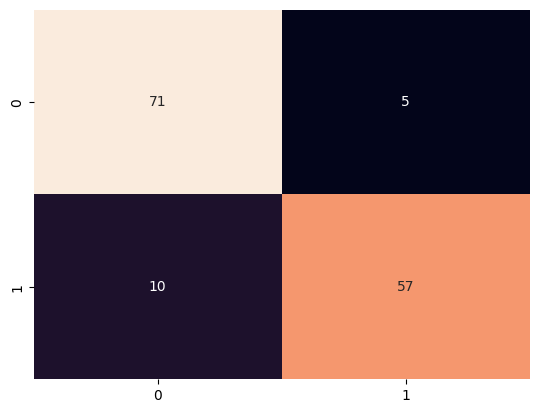

In [43]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, cbar=False)

### Random Forest (estimators = 10)

In [44]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [45]:
# Metrics
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92        76
         1.0       0.94      0.87      0.90        67

    accuracy                           0.91       143
   macro avg       0.91      0.91      0.91       143
weighted avg       0.91      0.91      0.91       143



<AxesSubplot: >

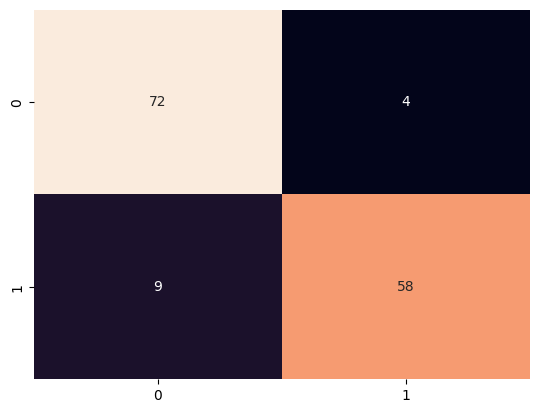

In [46]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, cbar=False)

### XGBoost

In [47]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

In [48]:
# Metrics
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.97      0.93        76
         1.0       0.97      0.85      0.90        67

    accuracy                           0.92       143
   macro avg       0.92      0.91      0.91       143
weighted avg       0.92      0.92      0.92       143



<AxesSubplot: >

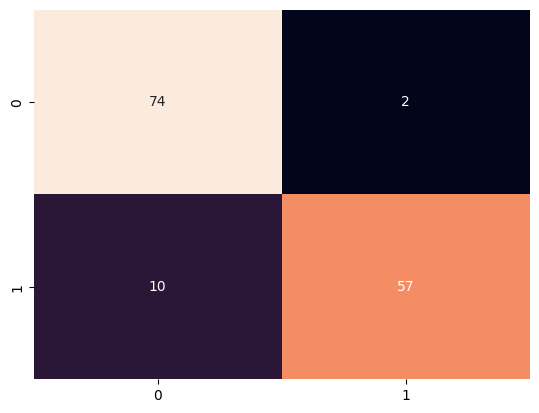

In [49]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, cbar=False)